# MIDTERM ESSAY
# Applied Probability and Statistics for Information Technology

**STUDENT'S NAME:** Nguyễn Quốc Nhật Hùng

**STUDENT ID:** 52300027

**CLASS and GROUP:**

Students submit this jupyter notebook presenting your solution and coding. Students giving correct solutions by using Markdown and typing your codes.

Save and submit only 1 file as: Student name_StudentID.ipynb (Example: TranVanAn_203456.ipynb)

You should solve and submit this report to your theory Google classroom within 14 days, from the beginning of Oct 29th 2024 to the end of Nov 11th 2024. Late submissions are not accepted. Submissions via email are not accepted.

This is an individual final report. NOT ALLOWED TO USE GOOGLE, CHATGPT, etc for copying similar solutions and codes. Any case of plagiarism will get 0.

# Question 1: (2 points)
A closed urn has 23 balls: 8 white, 6 blue and 9 red.

In [6]:
def cross(A, n):
    return {a+str(b+1) for a in A for b in range(n)}

urn = cross('W', 8) | cross('B', 6) | cross('R', 9)

Randomly select ***x*** balls
(know that each ball has the same probability of selection).

Use two last digits in your Student ID to get value x.

For example: Student ID: 0412347 => 47

In [8]:
def get_x(n):
    return int(( n / 99 ) * 4 + 6)

# my_student_id = 52300027
my_last_two_digits = 27

x = get_x(my_last_two_digits)
print("value of x: ", x)

value of x:  7


Find a list of all possible ***x*** balls and assign to variable $U$.

# Công thức tổ hợp: $C_n^k = \frac{n!}{k!(n-k)!}$


In [11]:
from itertools import combinations

U = list(combinations(urn, x))  # Tạo tất cả tổ hợp chập x của n phần tử
print("list of all possible x balls: ", U)


First 5 combinations: [('B6', 'R2', 'W3', 'B4', 'B5', 'R5', 'W5'), ('B6', 'R2', 'W3', 'B4', 'B5', 'R5', 'W8'), ('B6', 'R2', 'W3', 'B4', 'B5', 'R5', 'R6'), ('B6', 'R2', 'W3', 'B4', 'B5', 'R5', 'W2'), ('B6', 'R2', 'W3', 'B4', 'B5', 'R5', 'B1')]


Let *X* represent the random variable corresponding to the number of red balls in ***x*** balls.

Let *Y* represent the random variable corresponding to the number of white balls in ***x*** balls.

Compute the probability:
$P(X=3|Y=1)$ (present the steps along with illustrative code).

In [14]:
# Bước 1: Xác định các biến ngẫu nhiên cần tính
# - X: số lượng quả bóng đỏ trong mẫu x quả bóng
# - Y: số lượng quả bóng trắng trong mẫu x quả bóng
# - Mục tiêu: tính P(X = 3 | Y = 1)

# Bước 2: Khởi tạo biến đếm
# - total_y_equal_1: đếm số tổ hợp có Y=1 (1 bóng trắng)
# - x_equals_3_given_y_1: đếm số tổ hợp có X=3 và Y=1 (3 bóng đỏ và 1 bóng trắng)

# Bước 3: Lặp qua từng tổ hợp trong U để đếm
# - Với mỗi tổ hợp:
#   + Đếm số bóng đỏ (red_count)
#   + Đếm số bóng trắng (white_count)
#   + Nếu white_count = 1: tăng total_y_equal_1
#   + Nếu white_count = 1 và red_count = 3: tăng x_equals_3_given_y_1

# Bước 4: Tính xác suất có điều kiện
# P(X = 3 | Y = 1) = x_equals_3_given_y_1 / total_y_equal_1
# Nếu total_y_equal_1 = 0 thì xác suất = 0

# Bước 5: In kết quả xác suất P(X = 3 | Y = 1)

# Bước 2:
total_y_equal_1 = 0
x_equals_3_given_y_1 = 0

# Bước 3:
for combo in U:
    # Count red and white balls in combo
    red_count = white_count = 0
    for ball in combo:
        if ball.startswith('R'):
            red_count += 1
        elif ball.startswith('W'):
            white_count += 1

   # Condition: Y = 1
    if white_count == 1:
        total_y_equal_1 += 1
        # Condition: X = 3
        if red_count == 3:
            x_equals_3_given_y_1 += 1

# Trường hợp lỗi tính toán sẽ trả về xác suất = 0
probability = 0
# Bước 4:
if total_y_equal_1 > 0:
    probability = x_equals_3_given_y_1 / total_y_equal_1
print("P(X = 3 | Y = 1):", probability)

P(X = 3 | Y = 1): 0.3356643356643357


# Question 2: (3 points)

Study the statistical functions from the *scipy* library to solve the following questions.

**For each question, it is necessary to present the corresponding function, including its prototype, input, output, and the meaning of its parameters.** (1 point)

**2.1 (0.5 point):** Consider a random variable that follows normal distribution with mean 6 and variance 12. Calculate:

a) $P(X < 2)$

b) $P(4 \leq X \leq 8)$

#### Công thức tổng quát
Nếu biến ngẫu nhiên \( X \) tuân theo phân phối chuẩn với trung bình $\mu$ và độ lệch chuẩn $\sigma$, thì xác suất $ P(X \leq x) $ được tính bằng hàm phân phối tích lũy (CDF):
$$P(X \leq x) = \Phi\left(\frac{x - \mu}{\sigma}\right)$$
Trong đó:
- \( \Phi \) là hàm phân phối tích lũy của phân phối chuẩn.

#### Câu hỏi

Giả sử $X \sim N(\mu = 6, \sigma^2 = 12)$, độ lệch chuẩn là $\sigma = \sqrt{12}$.

1. **Tính \( P(X < 2) \)**:
   $$P(X < 2) = \Phi\left(\frac{2 - 6}{\sqrt{12}}\right)$$

2. **Tính $P(4 \leq X \leq 8)$**:
   $$P(4 \leq X \leq 8) = \Phi\left(\frac{8 - 6}{\sqrt{12}}\right) - \Phi\left(\frac{4 - 6}{\sqrt{12}}\right)$$

In [17]:
from scipy.stats import norm
import math
# Hàm norm.cdf(x, loc=mean, scale=std_dev) từ scipy.stats
# - x: giá trị cần tính xác suất
# - loc: trung bình (mean) của phân phối chuẩn 
# - scale: độ lệch chuẩn (standard deviation) của phân phối chuẩn
# Trả về: xác suất P(X ≤ x) với X là biến ngẫu nhiên tuân theo phân phối chuẩn

# Khai báo các tham số của phân phối chuẩn
mean_value = 6  # Giá trị trung bình
variance = 12   # Phương sai
standard_deviation = math.sqrt(variance)  # Độ lệch chuẩn

# a) Tính P(X < 2)
probability_less_than_2 = norm.cdf(2, loc=mean_value, scale=standard_deviation)
print("P(X < 2):", probability_less_than_2)

# b) Tính P(4 ≤ X ≤ 8)
probability_between_4_and_8 = norm.cdf(8, loc=mean_value, scale=standard_deviation) - norm.cdf(4, loc=mean_value, scale=standard_deviation)
print("P(4 ≤ X ≤ 8):", probability_between_4_and_8)


P(X < 2): 0.12410653949496181
P(4 ≤ X ≤ 8): 0.4362971383492269


**2.2 (0.5 point):** The number of bicycles crossing a bridge during the day follow a Poisson distribution with mean 28. What is the probability that on a randomly selected day 15 bicycles would have crossed the bridge?

#### Công thức tổng quát
Nếu biến ngẫu nhiên \( X \) tuân theo phân phối Poisson với trung bình $\lambda$, xác suất để $X = k$ là:
$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

Trong đó:
- $ \lambda $ là trung bình của phân phối,
- $ k! $ là giai thừa của $ k $.

#### Câu hỏi

Giả sử số lượng xe đạp băng qua cầu trong một ngày tuân theo phân phối Poisson với $ \lambda = 28 $.

- **Tính \( P(X = 15) \)**:
$$P(X = 15) = \frac{28^{15} e^{-28}}{15!}$$
  

In [18]:
from scipy.stats import poisson

# Trung bình của phân phối Poisson
lambda_poisson = 28

# Tính P(X = 15)
p_x_equals_15 = poisson.pmf(15, mu=lambda_poisson)
print("P(X = 15):", p_x_equals_15)


P(X = 15): 0.0026954132921724844


**2.3 (0.5 point):** Suppose that service times at a call center are exponentially distributed with an average call lasting 8 minutes. If there are 3 call center agents serving calls, what is the probability that each person completes his or her work in 10 minutes? Assume that the duration of each call is independent of every other call.

#### Công thức tổng quát
Nếu thời gian giữa các sự kiện tuân theo phân phối mũ với trung bình $ \theta $, thì xác suất để $ X \leq x $ là:
$$P(X \leq x) = 1 - e^{-\frac{x}{\theta}}$$
Trong đó:
- $ \theta $ là giá trị trung bình của phân phối (còn gọi là "scale" hoặc "rate" của phân phối mũ).

#### Câu hỏi

Giả sử thời gian xử lý cuộc gọi tuân theo phân phối mũ với thời gian trung bình là 8 phút.

- **Tính $ P(X \leq 10) $**:
  $$P(X \leq 10) = 1 - e^{-\frac{10}{8}}$$

In [19]:
from scipy.stats import expon

# Thời gian trung bình (lambda = 1/mean)
rate = 1 / 8

# Tính P(X ≤ 10)
p_x_less_than_10 = expon.cdf(10, scale=1/rate)
print("P(X ≤ 10):", p_x_less_than_10)


P(X ≤ 10): 0.7134952031398099


**2.4 (0.5 point):** From the experience, it is seen that 5% of the tyres produced by the machine are defective. Out of the 10 tyres produced, find the probability that at most 4 are defective.

#### Công thức tổng quát
Nếu biến ngẫu nhiên $ X $ tuân theo phân phối nhị thức với $ n $ lần thử và xác suất thành công $ p $ trong mỗi lần thử, xác suất để có nhiều nhất $ k $ thành công là:
$$P(X \leq k) = \sum_{i=0}^{k} \binom{n}{i} p^i (1 - p)^{n - i}$$
Trong đó:
- $ \binom{n}{i} $ là hệ số nhị thức, tính bằng $ \frac{n!}{i!(n-i)!} $,
- $ p $ là xác suất thành công trong mỗi lần thử,
- $ n $ là số lần thử.

#### Câu hỏi

Giả sử 5% lốp xe được sản xuất bị lỗi. Kiểm tra 10 lốp xe để tìm xác suất có tối đa 4 lốp bị lỗi.

- **Tính $ P(X \leq 4) $**:
$$P(X \leq 4) = \sum_{k=0}^{4} \binom{10}{k} (0.05)^k (0.95)^{10 - k}$$


In [20]:
from scipy.stats import binom

# Số lần thử và xác suất thành công (xác suất bị lỗi)
n = 10
p_defective = 0.05

# Tính P(X ≤ 4)
p_x_at_most_4 = binom.cdf(4, n, p_defective)
print("P(X ≤ 4):", p_x_at_most_4)


P(X ≤ 4): 0.9999363101685547


# Question 3: Using Monte Carlo method to estimate π (1.5 points)

**Consider a circle C centered at (0,0) with a diameter of 1.** This question asks students to explore how the Monte Carlo method can be used to estimate the value of π through random number generation. Students need to draw illustrations (by code or hand-drawn). (1 point)

1. **Thiết lập hình tròn và hình vuông**:
   - Hình tròn $ C $ có tâm tại $ (0, 0) $ với bán kính $ r = 0.5 $ (vì đường kính là 1).
   - Hình vuông bao quanh hình tròn có cạnh dài 1, từ $(-0.5, -0.5)$ đến $ (0.5, 0.5)$.

2. **Tạo điểm ngẫu nhiên**:
   - Tạo ngẫu nhiên các điểm $(x, y)$ bên trong hình vuông.
   - Kiểm tra xem mỗi điểm có nằm trong hình tròn hay không bằng cách sử dụng điều kiện $ x^2 + y^2 \leq r^2 $.

3. **Tính toán $\pi$**:
   - Tỷ lệ giữa số điểm nằm trong hình tròn và tổng số điểm được tạo ra sẽ xấp xỉ tỷ lệ diện tích của hình tròn và hình vuông.
   - Vì diện tích hình vuông là $1$ và diện tích hình tròn là $\pi r^2$, ta có:
     $$\pi \approx 4 \times \frac{\text{Số điểm nằm trong hình tròn}}{\text{Tổng số điểm}}$$

Now, imagine a square that circumscribes the circle. Randomly select points within the square, and use the Monte Carlo method to estimate the value of π based on the proportion of points that fall inside the circle. Write a simulator function of selecting point n times to estimate the π number. (1 point)

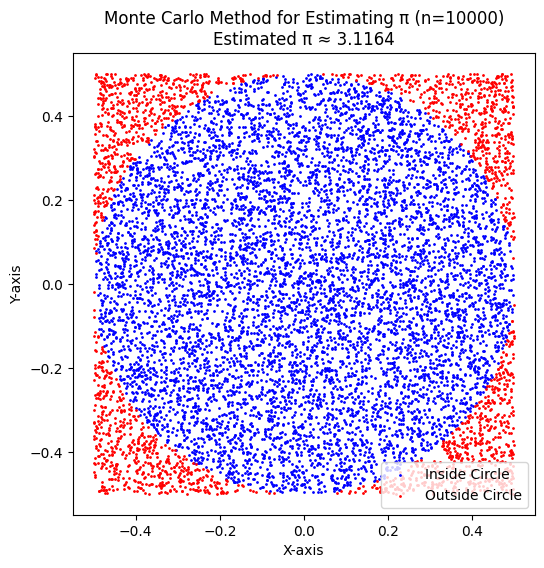

3.1164

In [24]:
import random
import matplotlib.pyplot as plt

def estimate_pi(n):
    inside_circle = 0  # Khởi tạo biến đếm số điểm nằm trong hình tròn
    inside_x = []      # Lưu trữ tọa độ x của các điểm nằm trong hình tròn
    inside_y = []      # Lưu trữ tọa độ y của các điểm nằm trong hình tròn
    outside_x = []     # Lưu trữ tọa độ x của các điểm nằm ngoài hình tròn
    outside_y = []     # Lưu trữ tọa độ y của các điểm nằm ngoài hình tròn
    
    for _ in range(n):
        # Tạo ngẫu nhiên tọa độ x, y trong phạm vi của hình vuông
        x = random.uniform(-0.5, 0.5)
        y = random.uniform(-0.5, 0.5)
        
        # Kiểm tra nếu điểm này nằm trong hình tròn
        if x**2 + y**2 <= 0.5**2:
            inside_circle += 1
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)
    
    # Tính toán pi dựa trên tỷ lệ số điểm trong hình tròn
    pi = 4 * inside_circle / n
    
    plt.figure(figsize=(6, 6))
    plt.scatter(inside_x, inside_y, color="blue", s=1, label="Inside Circle")
    plt.scatter(outside_x, outside_y, color="red", s=1, label="Outside Circle")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(f"Monte Carlo Method for Estimating π (n={n})\nEstimated π ≈ {pi}")
    plt.legend()
    plt.show()
    
    return pi

# Test with n = 100000
estimate_pi(10000)


# Question 4: Estimating the population mean from sample mean (2.0 points)

Let $\{X_1, X_2, \ldots, X_{30}\}$ be a random sample from the population with an unknown probability density function f(x,θ), where θ∈Θ. We have **equation (1): $E[\bar{X}]=\mu$**.

```
Need to use your STUDENT ID to get the value for the code below. READ COMMENT IN CODE.
```



- **Ký hiệu**:
  - $ E[\bar{X}] $: Kỳ vọng của trung bình mẫu.
  - $ \mu $: Trung bình của quần thể.

- **Ý tưởng**:
  - Ta sẽ lấy giá trị của $ a $ là hai chữ số đầu tiên trong mã số sinh viên, và $ b $ là hai chữ số cuối cùng trong mã số sinh viên.
  - Sử dụng các giá trị này để tạo một mẫu dữ liệu từ phân phối chuẩn với trung bình $ a $ và độ lệch chuẩn $ b $.

#### Ví dụ

Nếu mã số sinh viên của bạn là `523H0154`, thì:
- $ a = 01 $
- $ b = 54 $

Mã dưới đây tạo một mẫu dữ liệu từ phân phối chuẩn với các giá trị này.

In [27]:
import numpy as np

# my student id: 52300027

a = 0 # two first digits in our code   => 00
b = 27 # two last digits in our code   => 27
population_data = list(np.random.normal(a, b, 10000))
print(population_data)

[-14.609179006869415, -13.545251743179263, 22.38850668692407, 26.675915163025728, -17.98362074066507, 1.1130788293608826, -4.20043943056159, -59.55083974710819, 38.209469215019325, -4.534752607621684, 18.169160634779164, 7.375186564324166, 12.966638923026379, 18.783043369905652, -26.042849901976563, 7.428904833457318, 13.035476448302871, -35.82254977914975, 12.390747402822766, -46.70485164709606, -28.55357057700648, -3.9430799895821127, 45.99453668523547, -25.476527280216686, -14.416020712715584, 30.633832364941867, 0.10087508317583402, 3.8564628939518597, -15.725447591690076, -27.182597825764777, 1.9704683665338687, -40.9397338416642, -9.203665391727753, -19.268927203713858, 18.638626731912165, 34.937527190942575, 11.197023542104795, -0.13238654016274198, -31.96810782867235, 23.20427846794517, 11.24381633988613, -21.076202210114648, 4.761893201134702, 8.081627738389402, -19.739942840104572, -46.90452045075078, 4.954234391151218, 24.344096072734647, -37.59725030762686, 2.40919082735021

Let the population consist of 10000 elements, as described above. Please explain each step to demonstrate Equation (1) by selecting a random sample of size 30 from the population's distribution, including illustrative code.

1. **Tạo quần thể**: 
   - Sử dụng phân phối chuẩn với trung bình `a` và độ lệch chuẩn `b` (giá trị lấy từ mã số sinh viên) để tạo một quần thể có kích thước 10,000.
   
2. **Lấy mẫu ngẫu nhiên**: 
   - Chọn ngẫu nhiên 30 phần tử từ quần thể để tạo một mẫu. 
   - Tính toán trung bình của mẫu để so sánh với trung bình của quần thể.

3. **Tính toán và so sánh**:
   - Tính trung bình của mẫu ngẫu nhiên để ước lượng giá trị trung bình của quần thể.
   - Lặp lại quá trình lấy mẫu để thấy rằng trung bình mẫu xấp xỉ trung bình quần thể khi

In [28]:
# Bước 2: Lấy mẫu ngẫu nhiên kích thước 30
sample_size = 30
sample = np.random.choice(population_data, sample_size)

# Bước 3: Tính trung bình của quần thể và trung bình mẫu
population_mean = np.mean(population_data)
sample_mean = np.mean(sample)

print("Trung bình của quần thể (ước lượng µ):", population_mean)
print("Trung bình của mẫu:", sample_mean)

# Lặp lại quá trình lấy mẫu để thấy xu hướng
sample_means = [np.mean(np.random.choice(population_data, sample_size)) for _ in range(1000)]
print("Trung bình của các mẫu (sau 1000 lần lặp):", np.mean(sample_means))

Trung bình của quần thể (ước lượng µ): 0.19583130043516053
Trung bình của mẫu: -1.3757544007543459
Trung bình của các mẫu (sau 1000 lần lặp): 0.40877895899897304


# Question 5: (1.5 points) [Spam email classification]
We're now trying to find if emails are spam. Let's say that we have a big data set of 100 emails, and 20 of them are actually spam. So we want to build a classifier. The easiest classifier that we can find is one that says that everything is spam with a 20% probability, because that's all we know so far. So that's a pretty simple classifier. We want to find something more elaborate, and so we're going to look at a feature.

We're going to start noticing that the spam emails tend to have words like "lottery". So we're going to try to put the word "lottery" into our spam detector. We're going to do the following, we're going to see how many emails among the spam ones contain the word “lottery” and we notice that there's 14 of them. Now we're going to look at how many of the emails that are not spam, have the word "lottery". So there's 10 of them. So now, what is the probability that an email containing the word "lottery" is spam?

#### Sử dụng Định lý Bayes

Xác suất để một email có từ "lottery" là spam được tính theo công thức Bayes:
$$P(\text{Spam} | \text{Lottery}) = \frac{P(\text{Lottery} | \text{Spam}) \cdot P(\text{Spam})}{P(\text{Lottery})}$$

Trong đó:
- $ P(\text{Spam}) $: Xác suất một email bất kỳ là spam.
- $ P(\text{Lottery} | \text{Spam}) $: Xác suất một email là spam có chứa từ "lottery".
- $ P(\text{Lottery}) $: Xác suất một email bất kỳ chứa từ "lottery".

#### Tính toán các giá trị

1. $ P(\text{Spam}) = \frac{\text{Số email spam}}{\text{Tổng số email}} = \frac{20}{100} = 0.2 $
2. $ P(\text{Lottery} | \text{Spam}) = \frac{\text{Số email spam có từ lottery}}{\text{Số email spam}} = \frac{14}{20} = 0.7 $
3. $ P(\text{Lottery}) = \frac{\text{Số email có từ lottery}}{\text{Tổng số email}} = \frac{14 + 10}{100} = 0.24 $

#### Áp dụng công thức Bayes
$$P(\text{Spam} | \text{Lottery}) = \frac{0.7 \times 0.2}{0.24}$$

In [29]:
# Dữ liệu đã cho
total_emails = 100
spam_emails = 20
lottery_in_spam = 14
lottery_in_non_spam = 10

# Tính toán các xác suất
P_spam = spam_emails / total_emails
P_lottery_given_spam = lottery_in_spam / spam_emails
P_lottery = (lottery_in_spam + lottery_in_non_spam) / total_emails

# Áp dụng công thức Bayes
P_spam_given_lottery = (P_lottery_given_spam * P_spam) / P_lottery
print("Xác suất một email chứa từ 'lottery' là spam:", P_spam_given_lottery)

Xác suất một email chứa từ 'lottery' là spam: 0.5833333333333333


# **This is the end of the essay!**